In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

In [2]:
data = pd.read_csv('sample analysis.csv', delimiter = ',', index_col='Time,ms')
data

3         5          6           6.1       6.2        15  \
Time,ms                                                                    
0.0     -2.351363  0.000013 -10.800000  1.150000e-06  0.000003 -3.100000   
0.5     -2.473562  0.000012 -11.100000  9.600000e-07  0.000003 -3.450000   
1.0     -2.625094  0.000012 -11.500000  7.460000e-07  0.000002 -3.830000   
1.5     -2.804676  0.000012 -11.900000  5.060000e-07  0.000002 -4.250000   
2.0     -3.010519  0.000012 -12.400000  2.440000e-07  0.000001 -4.700000   
...           ...       ...        ...           ...       ...       ...   
98.0    -2.117023 -0.000012  24.090590  3.810000e-06  0.000004 -8.207112   
98.5    -2.444991 -0.000013  23.955892  4.010000e-06  0.000004 -8.046144   
99.0    -2.729824 -0.000014  23.885146  4.220000e-06  0.000004 -7.833394   
99.5    -2.971533 -0.000015  23.874649  4.450000e-06  0.000004 -7.574518   
100.0   -3.170631 -0.000015  23.919978  4.700000e-06  0.000005 -7.275576   

                   17      17.1  
Time,ms                          
0.0      1.470000e-06  0.000005  
0.5      1.310000e-06  0.000005  
1.0      1.130000e-06  0.000004  
1.5      9.300000e-07  0.000004  
2.0      7.250000e-07  0.000004  
...               ...       ...  
98.0    -8.300000e-06 -0.000011  
98.5    -7.690000e-06 -0.000011  
99.0    -7.080000e-06 -0.000011  
99.5    -6.470000e-06 -0.000010  
100.0   -5.860000e-06 -0.000010  

[201 rows x 8 columns]

In [3]:
signal = np.array(data['3'])
duration = np.array(data.index)
signal, duration

(array([ -2.35136281,  -2.47356229,  -2.62509366,  -2.80467589,
         -3.01051864,  -3.24033544,  -3.49136258,  -3.76038702,
         -4.04378488,  -4.3375635 ,  -4.6374148 ,  -4.9387736 ,
         -5.23688232,  -5.52686242,  -5.8037881 ,  -6.06276581,
         -6.29901478,  -6.50794982,  -6.68526445,  -6.82701147,
         -6.92968388,  -6.99028988,  -7.00642431,  -6.97633323,
         -6.89897433,  -6.77406524,  -6.6021239 ,  -6.38450183,
         -6.12340318,  -5.8218925 ,  -5.48389335,  -5.11417238,
         -4.71831072,  -4.30266527,  -3.87431373,  -3.44099271,
         -3.01102068,  -2.59321064,  -2.19677463,  -1.83121665,
         -1.50622088,  -1.2315304 ,  -1.01682292,  -0.87158168,
         -0.80496483,  -0.82567419,  -0.94182519,  -1.16082037,
         -1.48922641,  -1.93265919,  -2.49567529,  -3.18167372,
         -3.99280907,  -4.92991694,  -5.99245141,  -7.17844159,
         -8.48445779,  -9.90559965, -11.43549707, -13.06633203,
        -14.78887316, -16.59253576, -18.

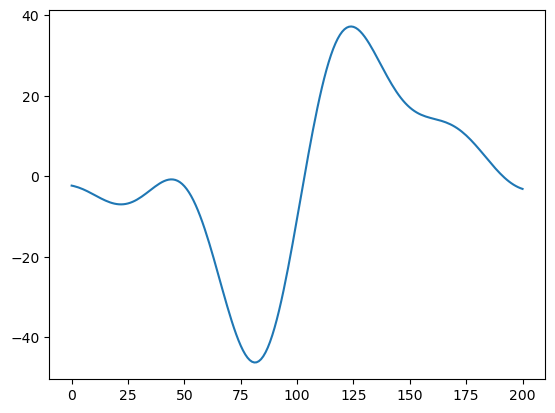

In [4]:
plt.plot(signal)
plt.show()

In [5]:
def nextpowof2(x):
    n=1
    while n<x:n*=2
    return n

In [6]:
# plt.loglog(frequency, amplitude,'*-')
# plt.xlabel('Frequncy,Hz')
# plt.ylabel('Amplitude')
# plt.title('Signal Amplitude Spectrum')
# plt.show()

In [7]:
def compute_fft(sig: str, D):
    """Compute the FFT of a signal
    sig: input signal in numpy array format
    D: duration of the signal
    
    returns the frequency, amplitude and power of the signal in numpy array format
    """
    signal = np.array(data[sig])
    sample_rate = 2000 # in Hz
    num_samples = len(signal)
    time_step = 0.0005 # in seconds
    sample_freq = 1 / time_step
    pow2 = (nextpowof2(num_samples))
    fft_output = rfft(signal) / num_samples
    freqs = rfftfreq(num_samples, time_step)
    amplitude = np.abs(fft_output)
    power = amplitude ** 2
    return signal, freqs, amplitude, power

In [8]:
def plot_ft_signal(sig, freq, amp, amp_pow):
    fig = plt.figure(figsize = (20, 15))
    ax = fig.add_subplot(221)
    plt.gca().set_title('Time Domain Signal')
    plt.plot(sig)
    plt.xlabel('Time, ms')
    plt.ylabel('Amplitude, µV')
    ax = fig.add_subplot(222)
    plt.gca().set_title('Frequency Domain Output Signal')
    plt.plot(freq, amp)
    plt.xlabel('Frequency, Hz')
    plt.ylabel('Amplitude, µV')
    ax = fig.add_subplot(223)
    plt.gca().set_title('Power Spectrum')
    plt.plot(freq, amp_pow)
    plt.xlabel('Frequency, Hz')
    plt.ylabel('Power')
    ax = fig.add_subplot(224)
    plt.gca().set_title('Log Spectrum')
    plt.loglog(freq, amp,'*-')
    plt.xlabel('Frequency, Hz')
    plt.ylabel('Amplitude, µV')
    plt.show()

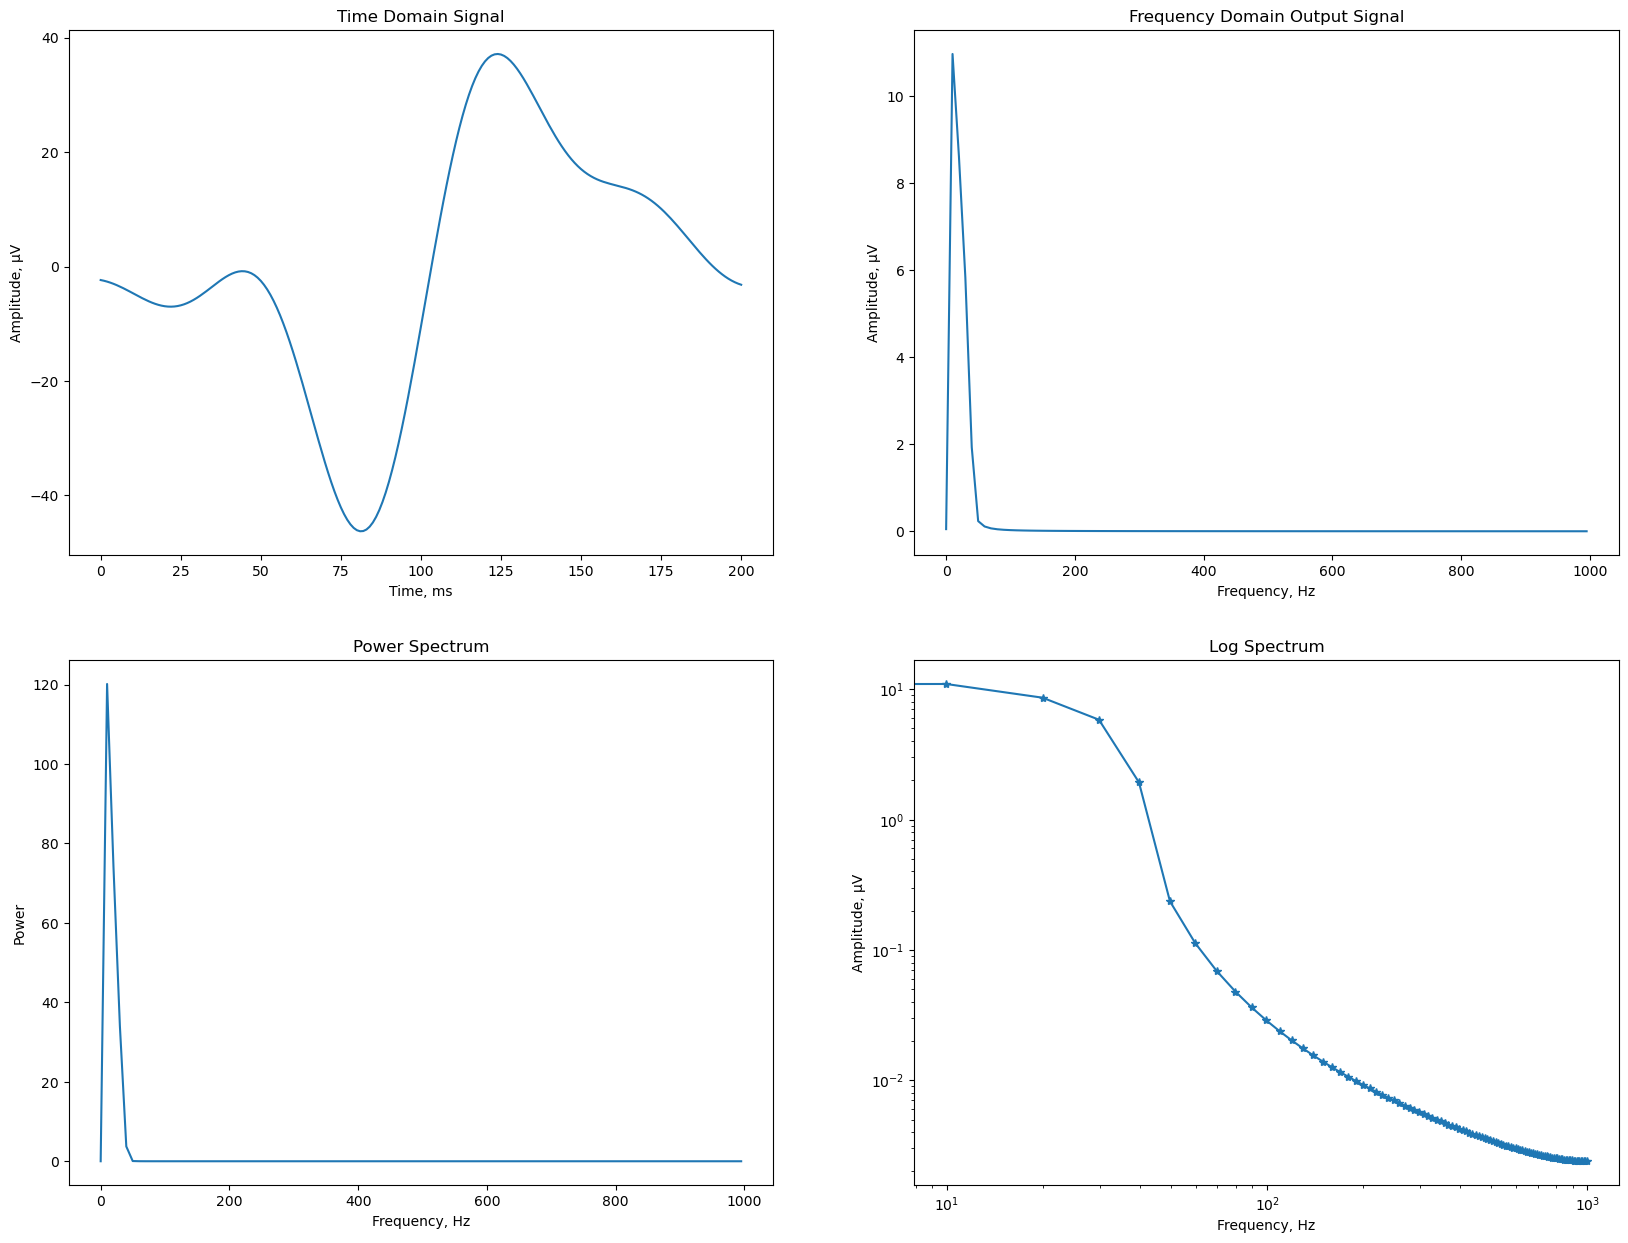

In [9]:
sig3, freq3, amp3, power3 = compute_fft('3', duration) # healthy
plot_ft_signal(sig3, freq3, amp3, power3)

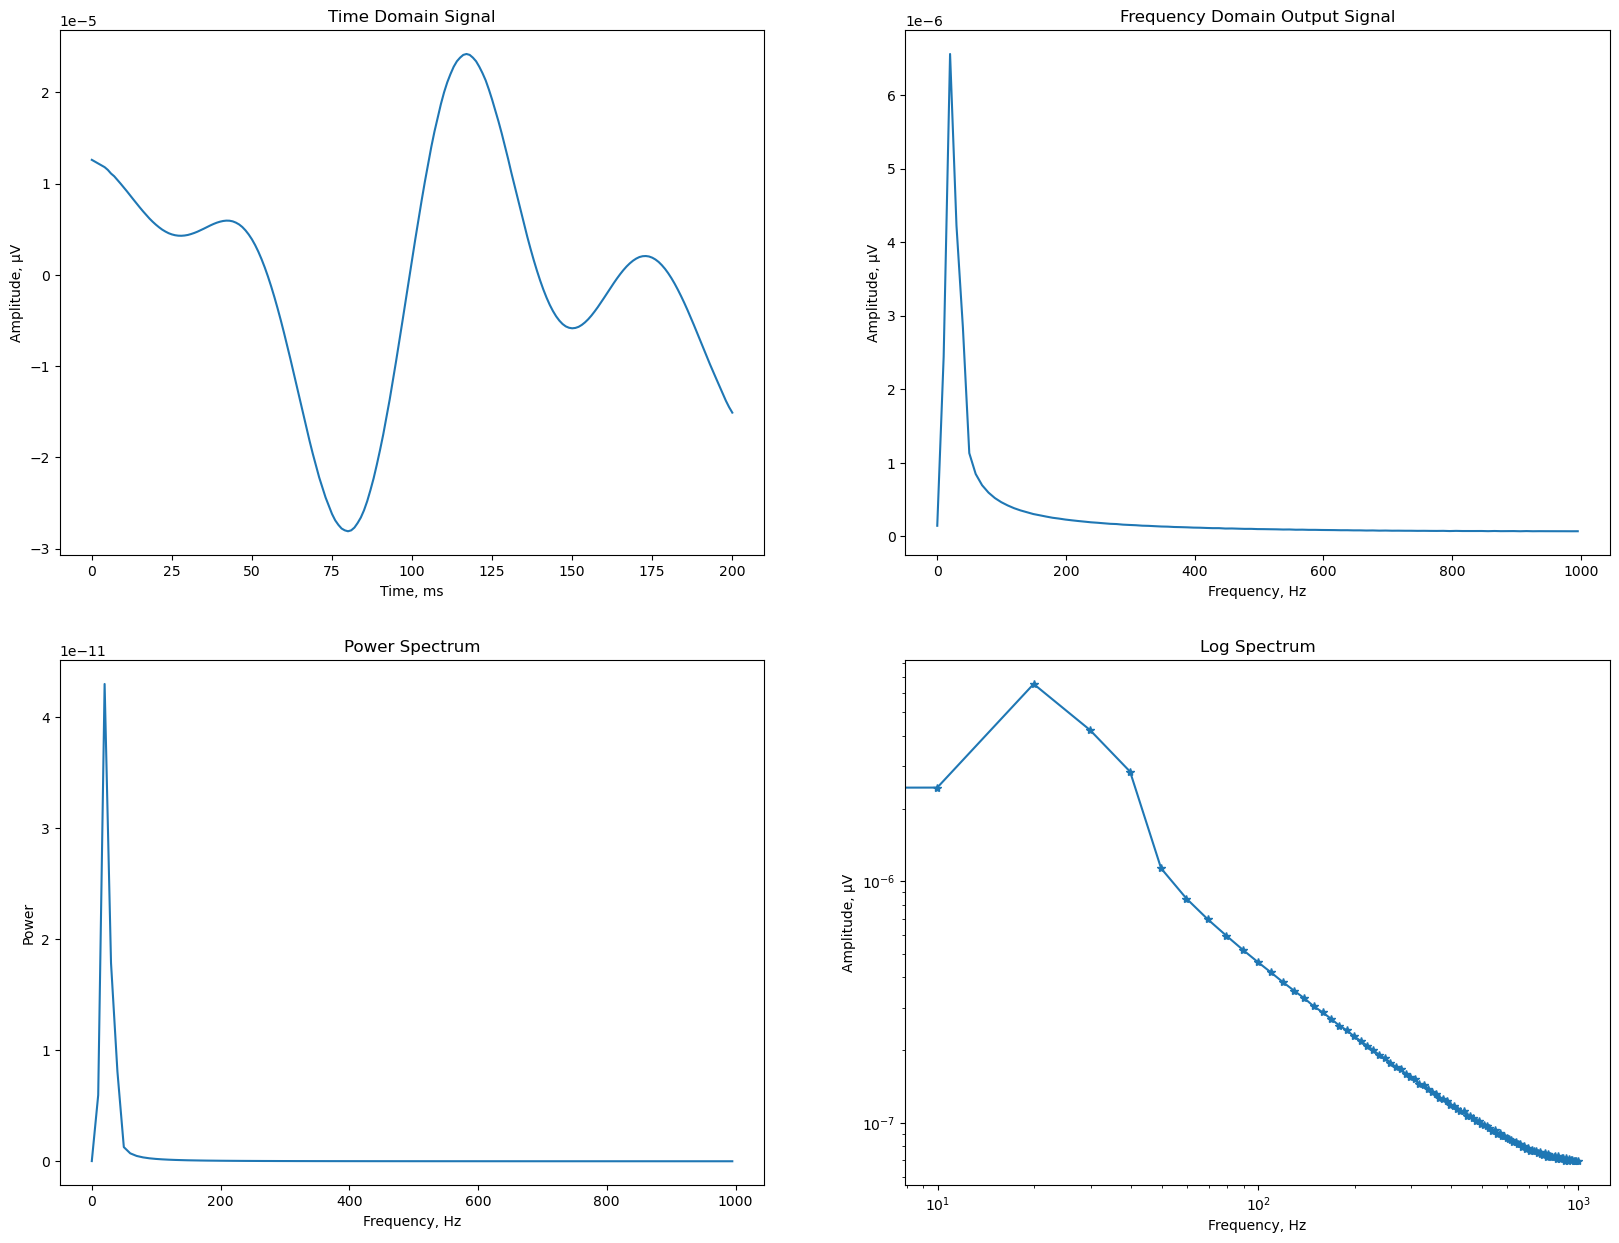

In [10]:
sig5, freq5, amp5, power5 = compute_fft('5', duration) # Unhealthy
plot_ft_signal(sig5, freq5, amp5, power5)

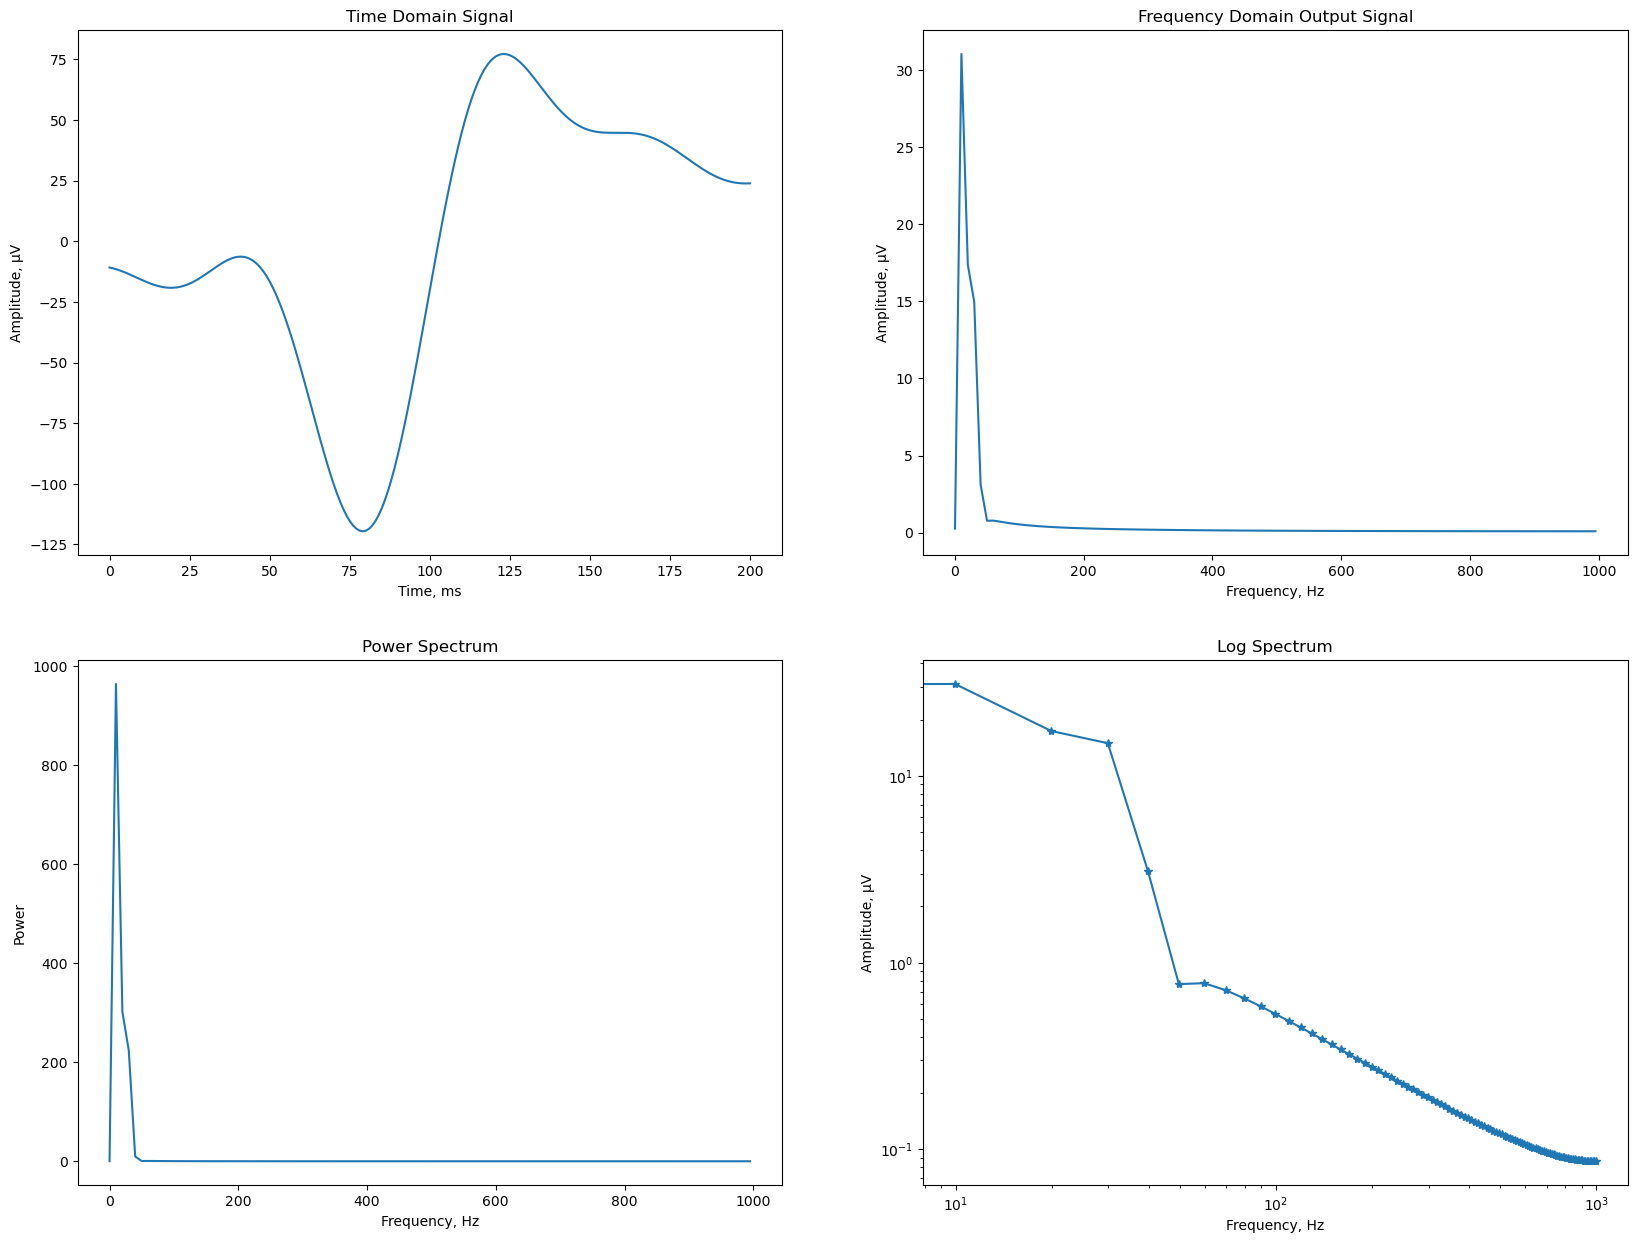

In [11]:
sig6, freq6, amp6, power6 = compute_fft('6', duration) # Unhealthy
plot_ft_signal(sig6, freq6, amp6, power6)

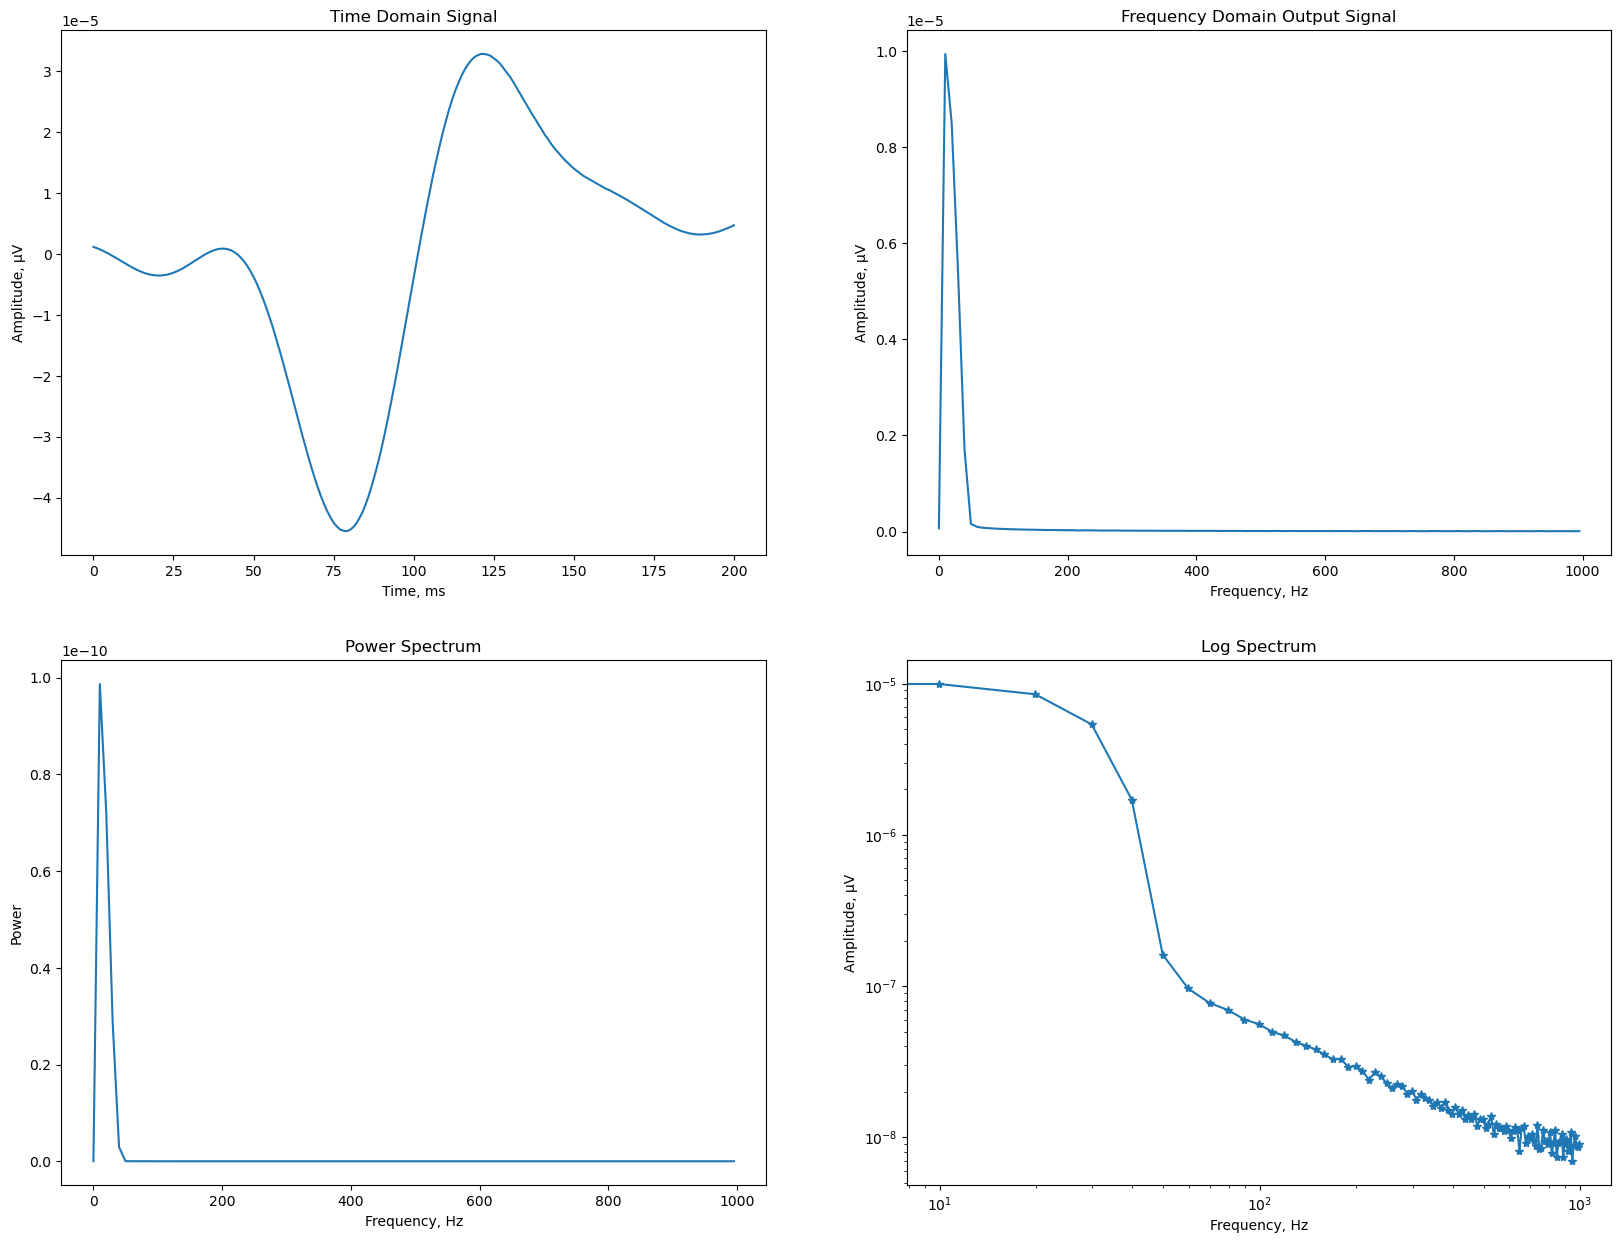

In [12]:
sig6_1, freq6_1, amp6_1, power6_1 = compute_fft('6.1', duration) # Unhealthy
plot_ft_signal(sig6_1, freq6_1, amp6_1, power6_1)

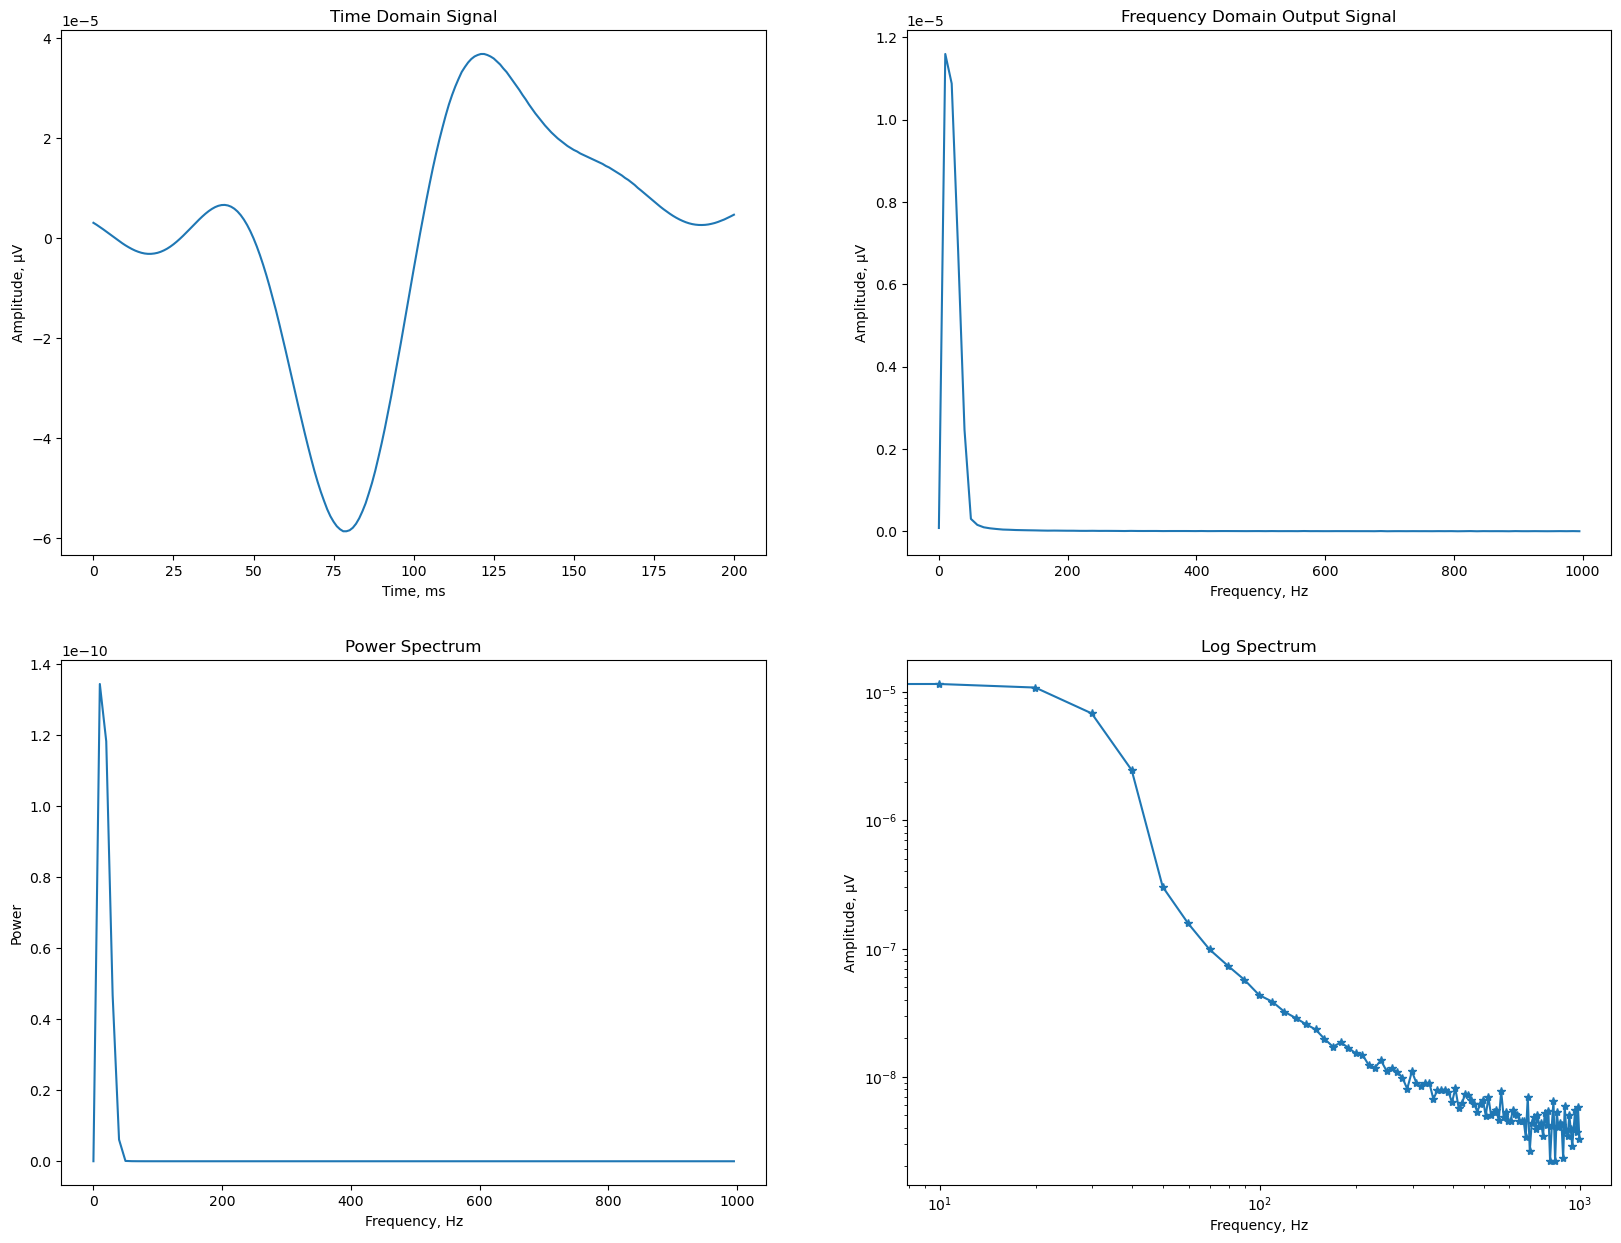

In [13]:
sig6_2, freq6_2, amp6_2, power6_2 = compute_fft('6.2', duration) # Unhealthy
plot_ft_signal(sig6_2, freq6_2, amp6_2, power6_2)

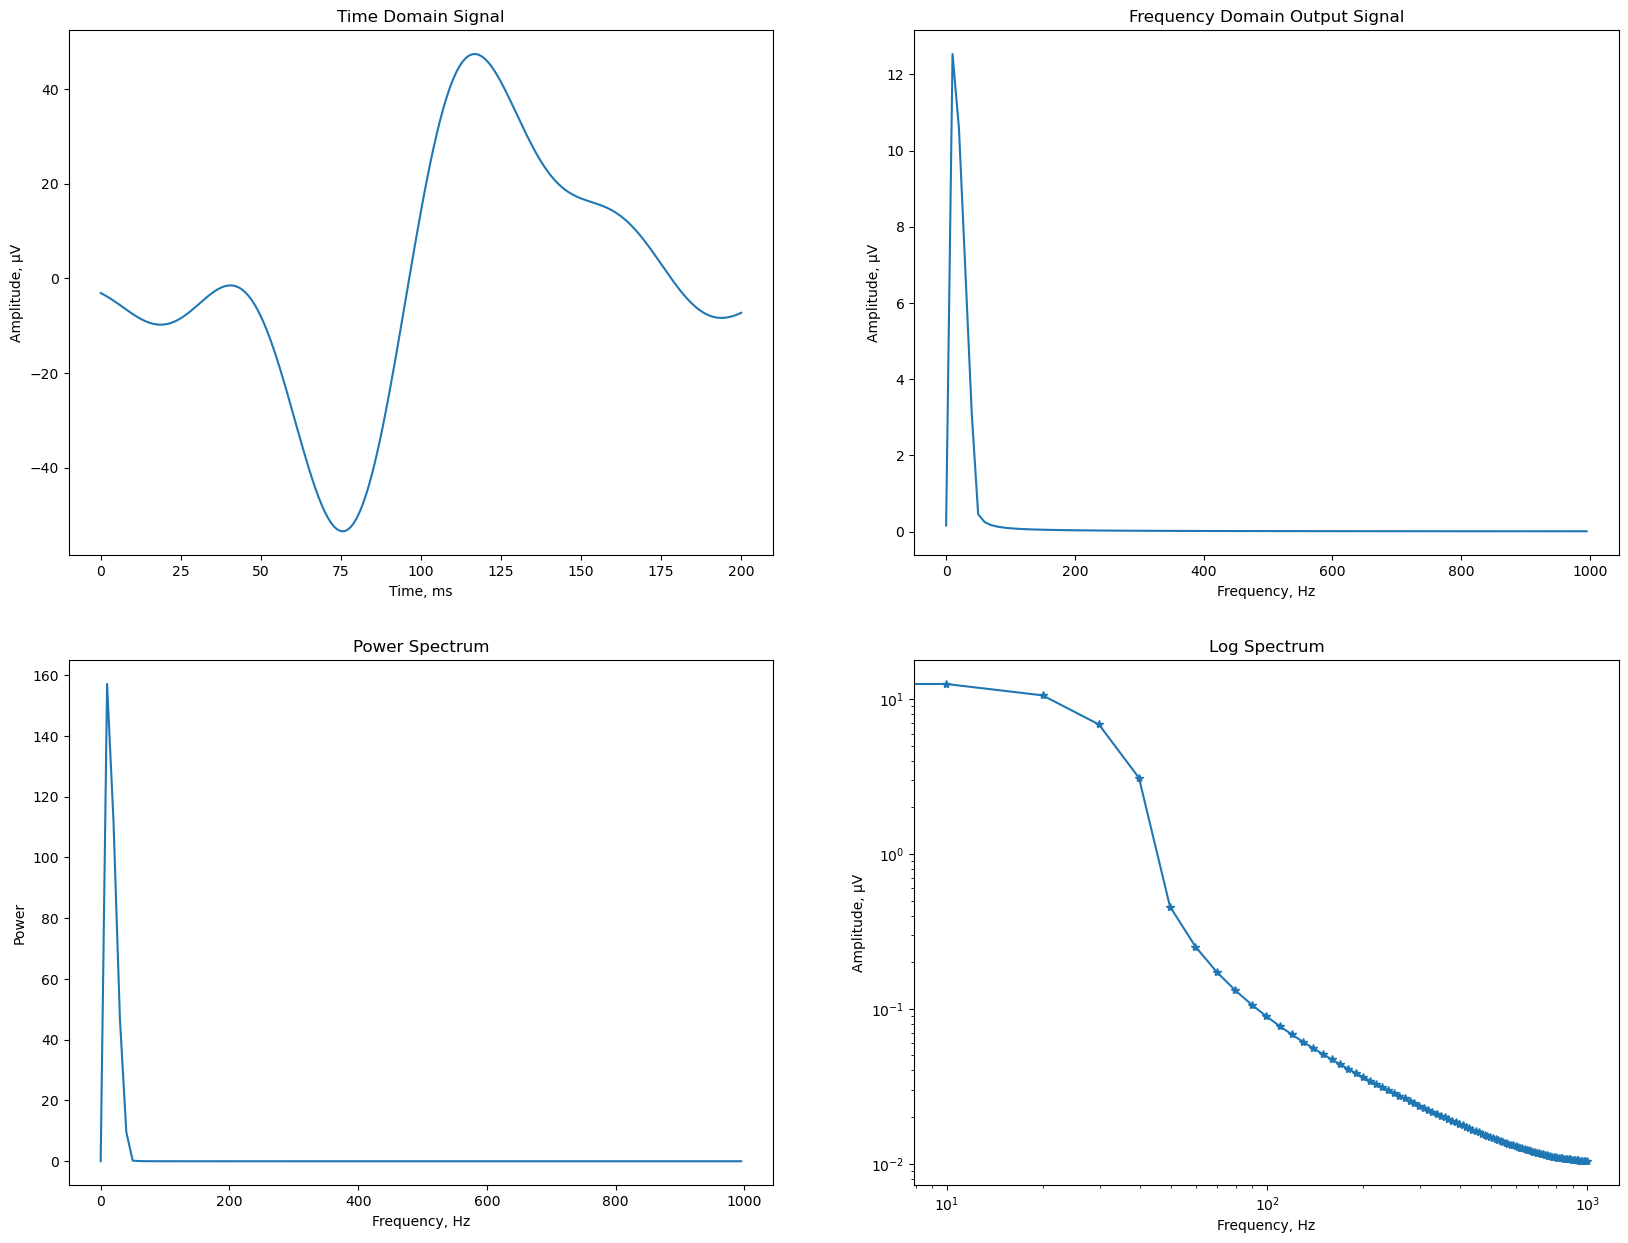

In [14]:
sig15, freq15, amp15, power15 = compute_fft('15', duration) # healthy
plot_ft_signal(sig15, freq15, amp15, power15)

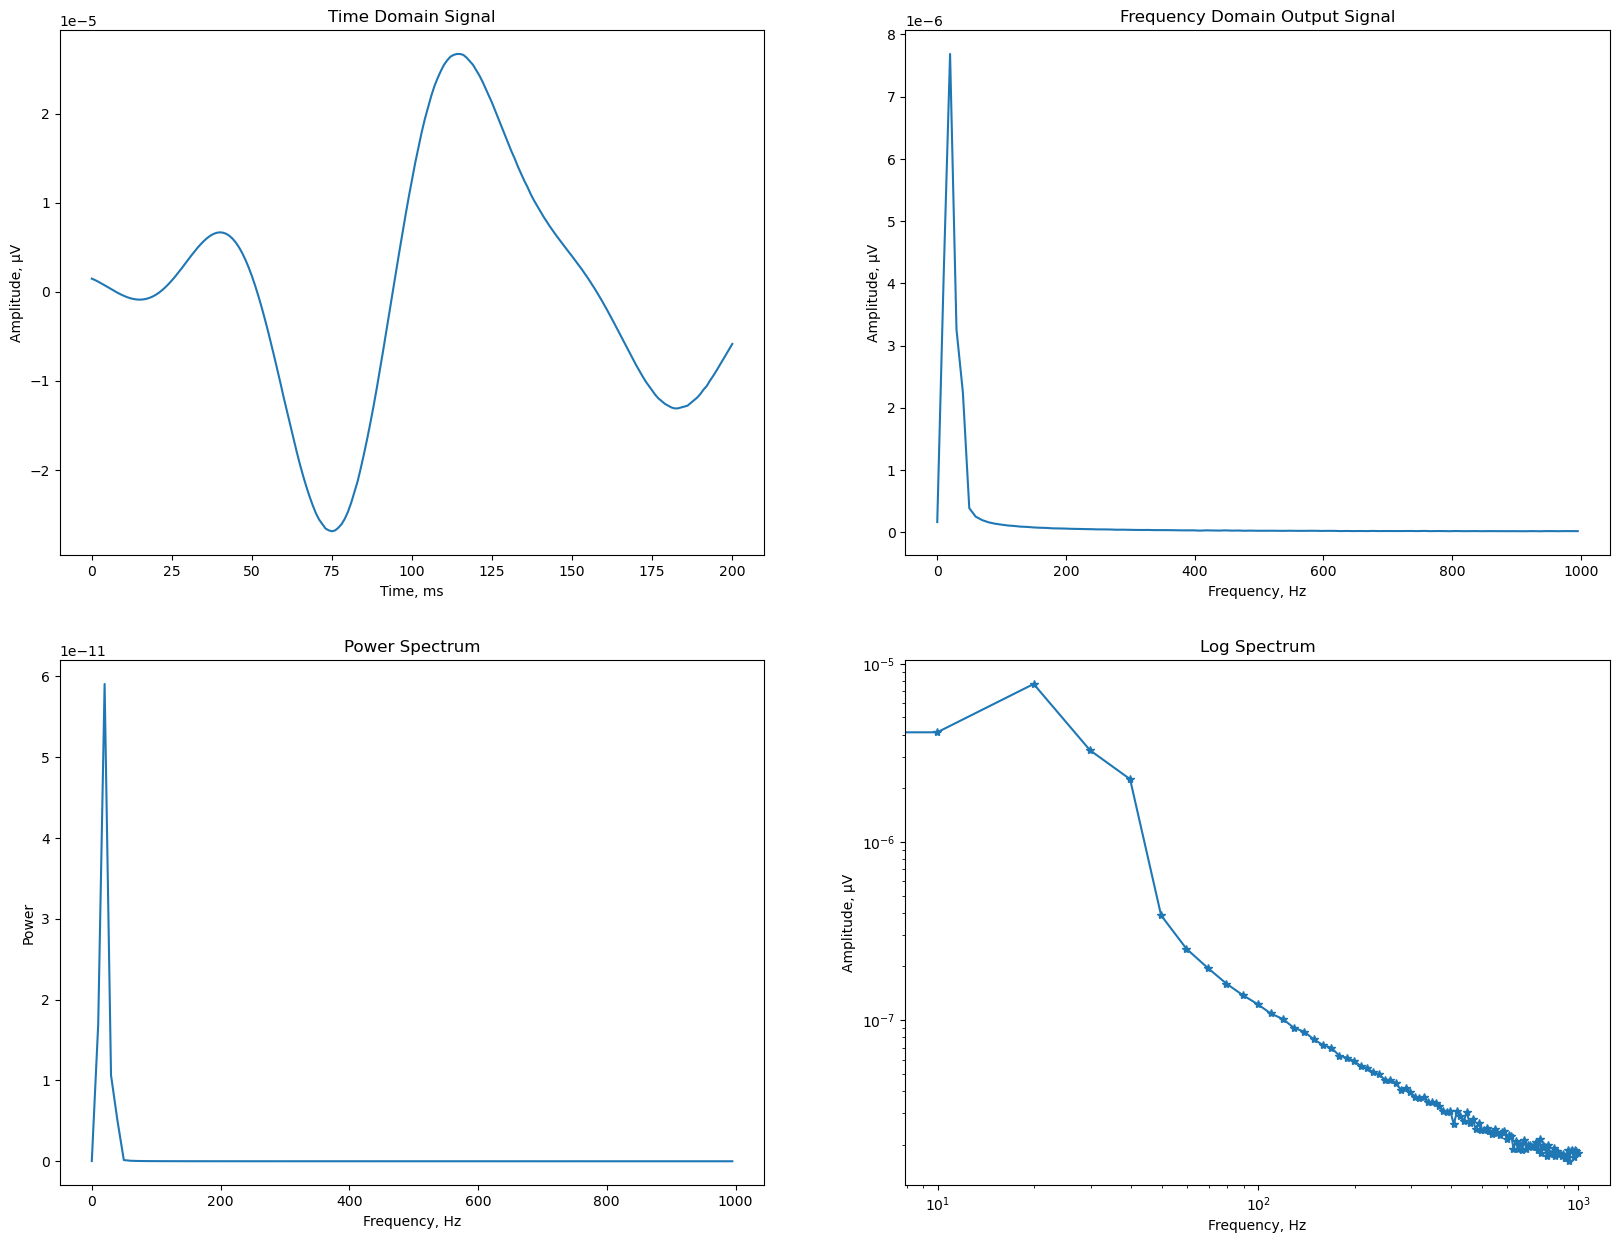

In [15]:
sig17, freq17, amp17, power17 = compute_fft('17', duration)
plot_ft_signal(sig17, freq17, amp17, power17)

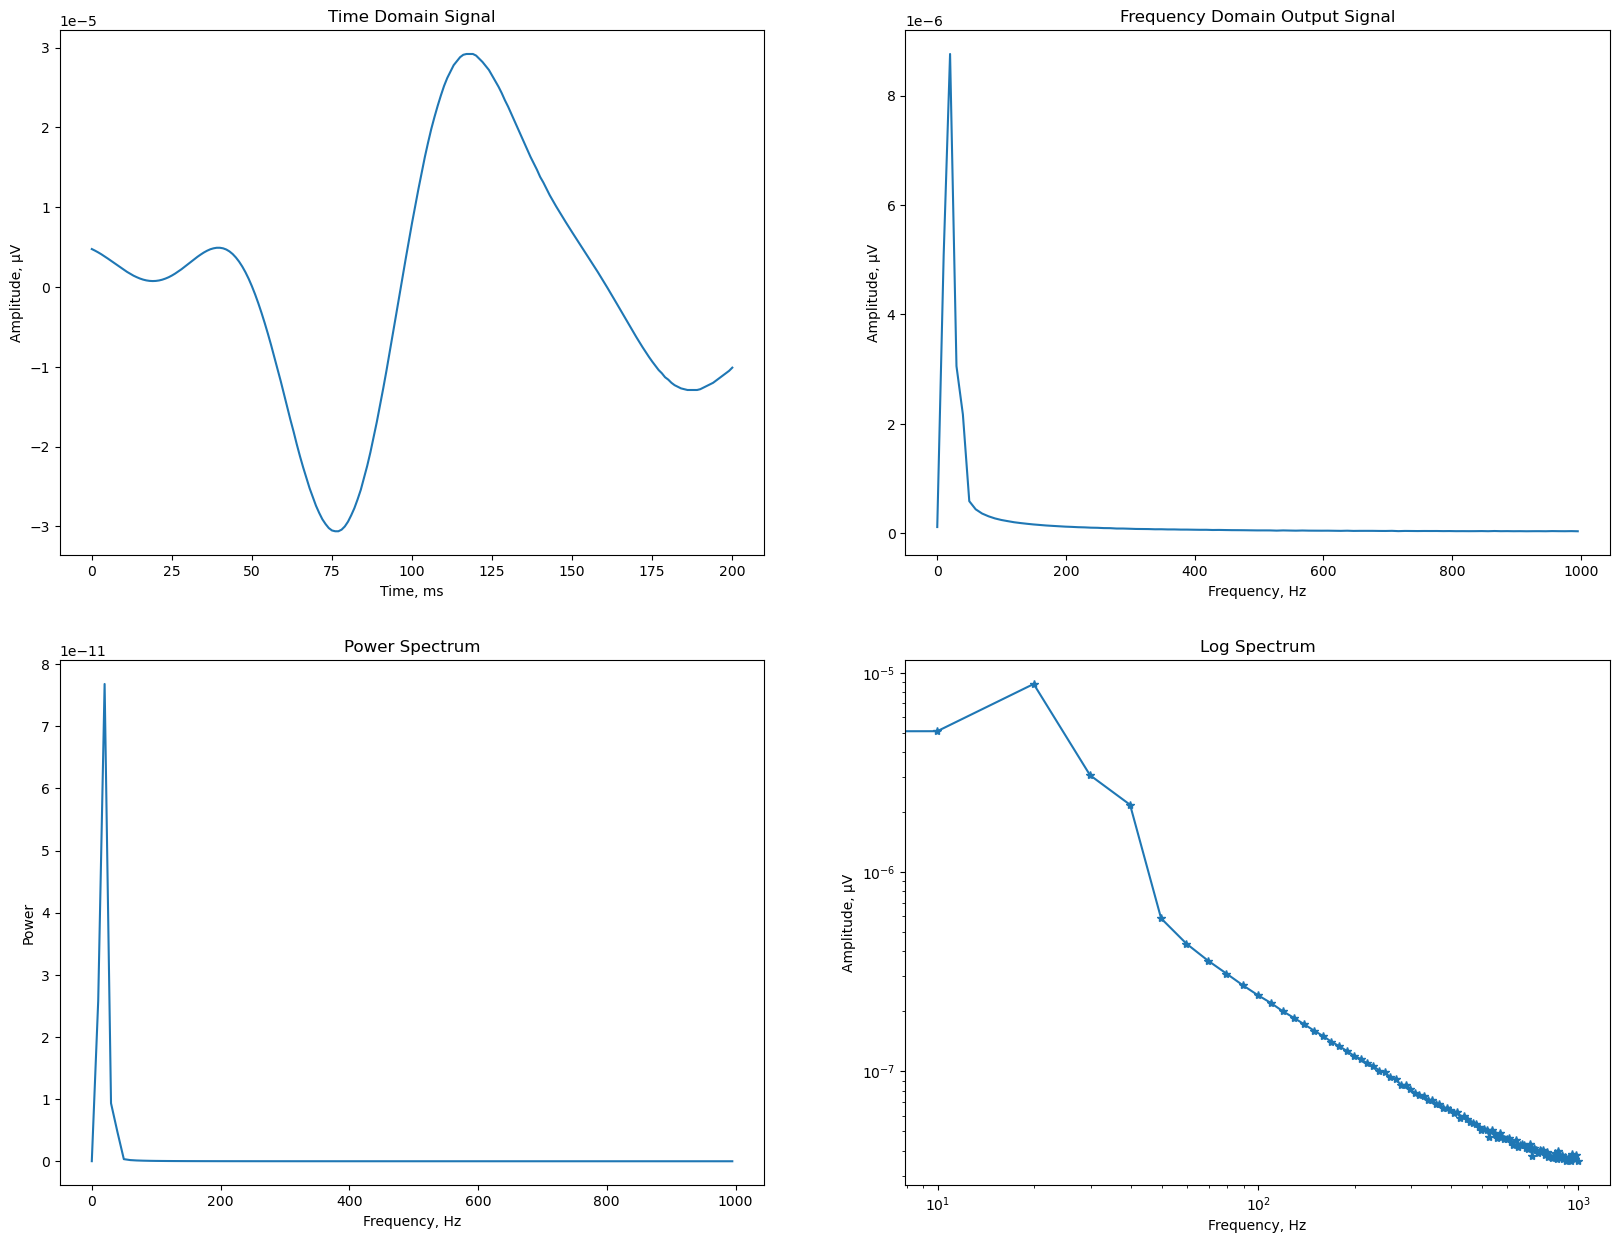

In [16]:
sig17_1, freq17_1, amp17_1, power17_1 = compute_fft('17.1', duration) # healthy
plot_ft_signal(sig17_1, freq17_1, amp17_1, power17_1)

In [17]:
from matplotlib.colors import LinearSegmentedColormap

colors = ['blue', 'yellow', 'green', 'red']
# n_bins = [0.0, 0.25, 0.5, 0.75, 1.0]
cmap_name = 'segmented_colormap'
segmented_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=len(colors))

In [28]:
def plot_spectrogram(sig: str, nfft, noverlap, colormap):
    time_step = 0.0005 # in seconds
    sample_freq = 1 / time_step
    signal = np.array(data[sig])
    plt.specgram(signal, Fs = sample_freq, NFFT = nfft, noverlap = noverlap, cmap = colormap)
    plt.colorbar()
    plt.xlabel('Time')
    plt.ylabel('Frequency')

In [19]:
def show_hist(img):
  r = img[:,:,0]
  g = img[:,:,1]
  b = img[:,:,2]
  bins = 51       # number of splits/bins
  rg = (0,255)   # the range of values we are interested in for splitting
  plt.figure(figsize=(18,4))
  plt.subplot(131)
  plt.hist(r.flatten(), bins, rg, color='r') #you can use any: flatten or ravel functions
  plt.title("R")
  plt.ylabel('Pixel count')
  plt.xlabel('Pixel intensity')
  plt.subplot(132)
  plt.hist(g.ravel(), bins, rg, color='g')
  plt.title("G")
  plt.xlabel('Pixel intensity')
  plt.subplot(133)
  plt.hist(b.ravel(), bins, rg, color='b')
  plt.title("B")
  plt.xlabel('Pixel intensity')

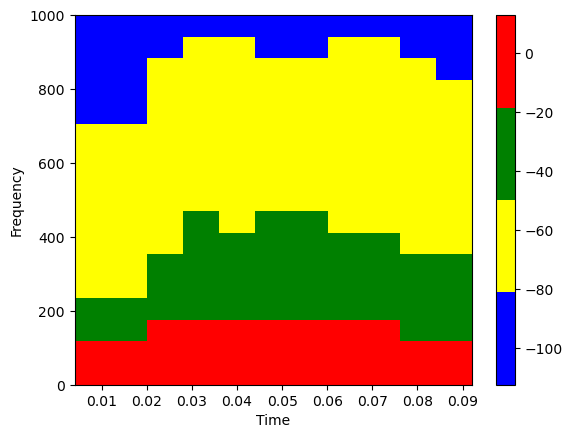

In [20]:
plot_spectrogram('3', 32, 16, segmented_cmap) # healthy

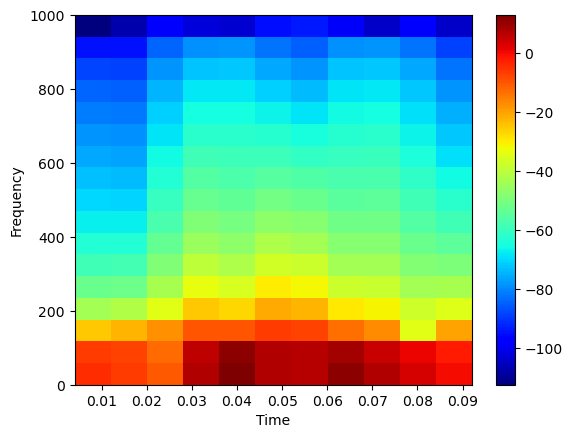

In [29]:
image = plot_spectrogram('3', 32, 16, 'jet')

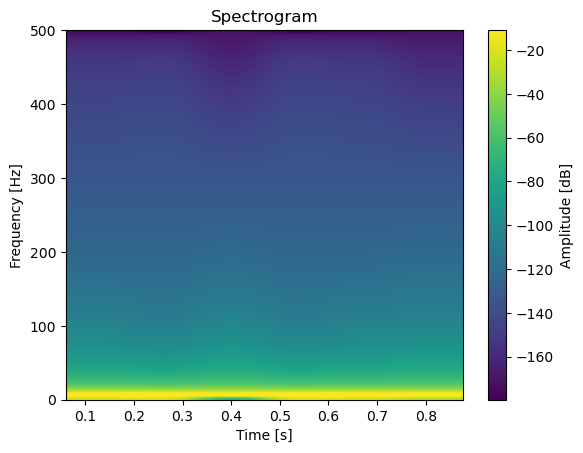

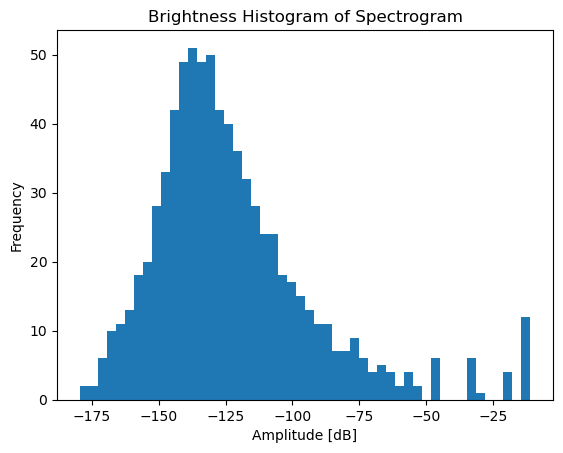

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Create a sample signal
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs)  # Time vector
freq = 5  # Frequency of the signal
signal_data = np.sin(2 * np.pi * freq * t)

# Compute and plot the spectrogram
Pxx, freqs, bins, im = plt.specgram(signal_data, NFFT=256, Fs=fs, noverlap=120)
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('Spectrogram')
plt.colorbar().set_label('Amplitude [dB]')
plt.show()

# Convert the spectrogram to decibels
Pxx_dB = 10 * np.log10(Pxx)

# Flatten the spectrogram data
Pxx_dB_flat = Pxx_dB.flatten()

# Plot the brightness histogram
plt.hist(Pxx_dB_flat, bins=50)
plt.xlabel('Amplitude [dB]')
plt.ylabel('Frequency')
plt.title('Brightness Histogram of Spectrogram')
plt.show()


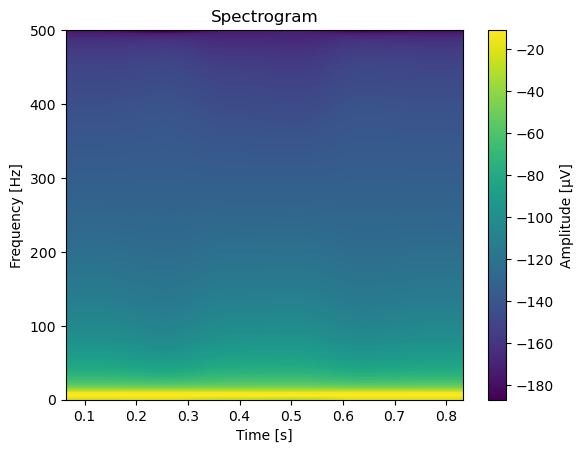

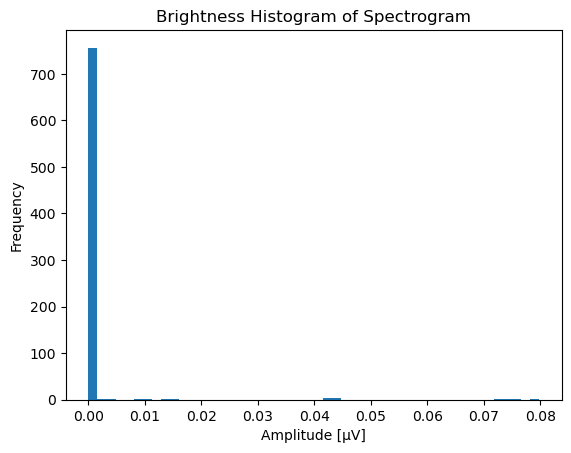

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Create a sample signal
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs)  # Time vector
freq = 5  # Frequency of the signal
signal_data = np.sin(2 * np.pi * freq * t)

# Compute and plot the spectrogram
Pxx, freqs, bins, im = plt.specgram(signal_data, NFFT=256, Fs=fs, noverlap=128)
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('Spectrogram')
plt.colorbar().set_label('Amplitude [μV]')
plt.show()

# Flatten the spectrogram data
Pxx_flat = Pxx.flatten()

# Plot the brightness histogram
plt.hist(Pxx_flat, bins=50)
plt.xlabel('Amplitude [μV]')
plt.ylabel('Frequency')
plt.title('Brightness Histogram of Spectrogram')
plt.show()


In [ ]:
plot_spectrogram('5', 32, 16, segmented_cmap) # Unhealthy

In [ ]:
plot_spectrogram('5', 32, 16, 'jet')

In [ ]:
plot_spectrogram('15', 32, 16, 'jet') # healthy

In [ ]:
plot_spectrogram('6', 32, 16, 'jet') # Unhealthy

In [ ]:
plot_spectrogram('17', 32, 16, 'jet') # healthy

In [ ]:
plot_spectrogram('6.1', 32, 4, 'jet') # Unhealthy

In [ ]:
plot_spectrogram('17.1', 32, 16, 'jet') # healthy

In [ ]:
plot_spectrogram('6.2', 32, 16, 'jet') # Unhealthy

In [ ]:
# import pywt
# import numpy as np
# import matplotlib.pyplot as plt

# # Generate a test signal
# x = np.linspace(0, 1, num=512)
# y = np.sin(250 * np.pi * x)

# # Perform the discrete wavelet transform
# coeffs = pywt.wavedec(y, 'db4', level=5)

# # Plot the DWT coefficients
# plt.figure(figsize = (15, 20))
# plt.subplot(2, 1, 1)
# plt.plot(y)
# plt.title('Original Signal')
# plt.subplot(2, 1, 2)
# for i in range(len(coeffs)):
#     plt.plot(coeffs[i], label='Level {}'.format(i))
# plt.legend()
# plt.title('DWT Coefficients')

# # Perform the continuous wavelet transform
# cwtmatr, freqs = pywt.cwt(y, np.arange(1, 200), 'mexh')

# # Plot the CWT coefficients
# plt.figure(figsize = (15, 20))
# plt.subplot(2, 1, 1)
# plt.plot(y)
# plt.title('Original Signal')
# plt.subplot(2, 1, 2)
# plt.imshow(cwtmatr, aspect='auto', cmap='coolwarm')
# plt.colorbar()
# plt.title('CWT Coefficients')
# plt.show()


In [ ]:
from matplotlib.colors import LinearSegmentedColormap

colors = ['red', 'green', 'blue', 'yellow']
n_bins = [200, 400, 600, 800, 1000]
cmap_name = 'segmented_colormap'
segmented_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=len(colors))

from scipy.signal import spectrogram

# Replace this with your actual signal and sampling rate
signal = np.random.randn(1000)
sampling_rate = 1 / 0.0005

frequencies, times, Sxx = spectrogram(signal, fs=sampling_rate)

plt.pcolormesh(times, frequencies, Sxx, cmap=segmented_cmap)
plt.colorbar()
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample signal
Fs = 3600
t = np.arange(0, 1, 1/Fs)
y = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)

NFFT = len(y)

# Compute the amplitude spectrum (magnitude) using FFT
Y = np.fft.fft(y, NFFT)
amplitude_spectrum = np.abs(Y) / NFFT

# Compute the power spectrum
power_spectrum = (1 / (Fs * NFFT)) * np.abs(Y) ** 2
power_spectrum = power_spectrum[:NFFT//2]

# Plot the amplitude and power spectra
f = np.linspace(0, Fs/2, NFFT//2)

plt.figure(figsize = (10, 15))
plt.subplot(2, 1, 1)
plt.plot(f, amplitude_spectrum[:NFFT//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Amplitude Spectrum')

plt.subplot(2, 1, 2)
plt.plot(f, 10 * np.log10(power_spectrum))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBW)')
plt.title('Power Spectrum')

plt.show()


In [16]:
%matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_spectrogram(signal_data, sampling_frequency):
    # Compute the spectrogram
    f, t, Sxx = signal.spectrogram(signal_data, sampling_frequency)

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    T, F = np.meshgrid(t, f)
    ax.plot_surface(T, F, 10 * np.log10(Sxx), cmap='viridis')

    # Set labels and title
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Frequency [Hz]')
    ax.set_zlabel('Amplitude [dB]')
    ax.set_title('3D Spectrogram')

    # Show the plot
    plt.show()


Using matplotlib backend: nbAgg


In [17]:
# Create a sample signal
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs)  # Time vector
freq = 5  # Frequency of the signal
signal_data = np.sin(2 * np.pi * freq * t)

# Call the function to plot the 3D spectrogram
plot_3d_spectrogram(signal_data, fs)


<IPython.core.display.Javascript object>

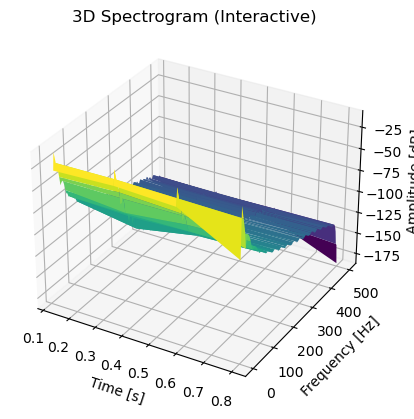

In [21]:
import IPython
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_spectrogram(signal_data, sampling_frequency):
    # Compute the spectrogram
    f, t, Sxx = signal.spectrogram(signal_data, sampling_frequency)

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    T, F = np.meshgrid(t, f)
    ax.plot_surface(T, F, 10 * np.log10(Sxx), cmap='viridis')

    # Set labels and title
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Frequency [Hz]')
    ax.set_zlabel('Amplitude [dB]')
    ax.set_title('3D Spectrogram (Interactive)')

    # Show the plot
    plt.show()

# Create a sample signal
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs)  # Time vector
freq = 5  # Frequency of the signal
signal_data = np.sin(2 * np.pi * freq * t)

# Call the function to plot the interactive 3D spectrogram
plot_3d_spectrogram(signal_data, fs)


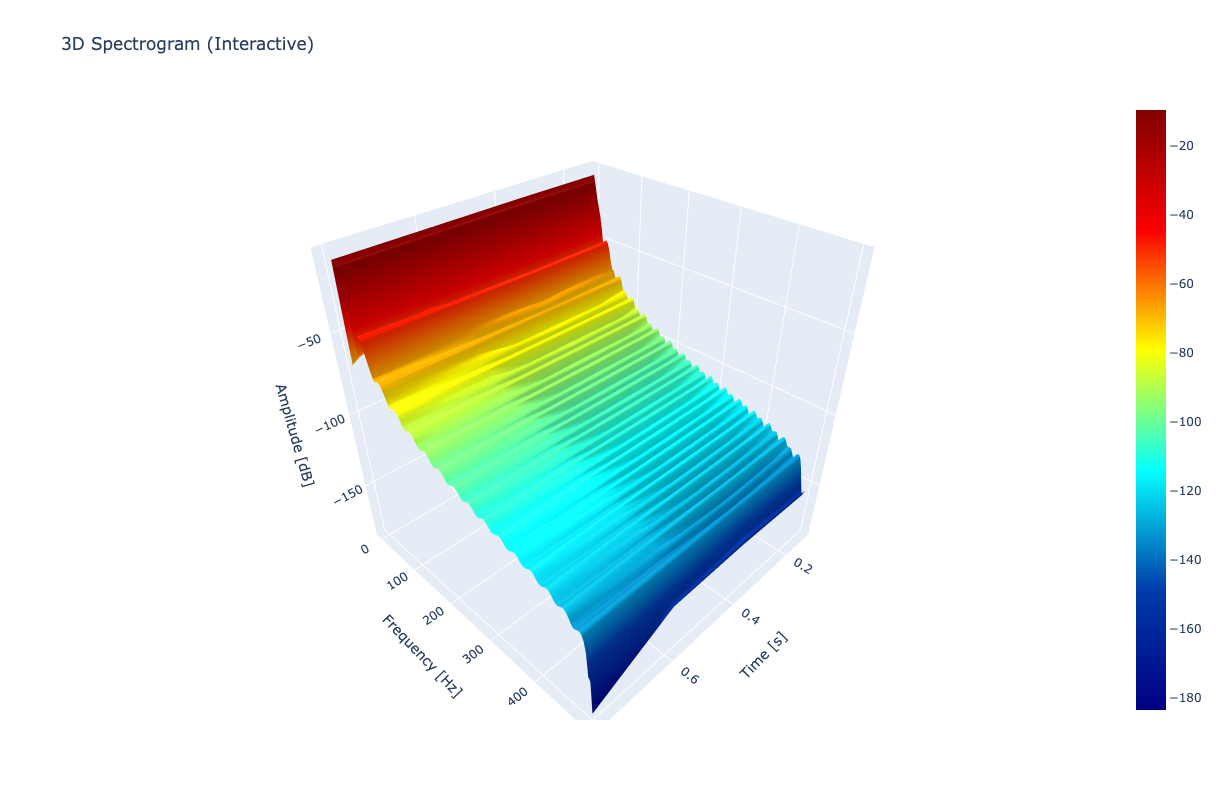

In [4]:
import numpy as np
import plotly.graph_objs as go
from scipy import signal

def plot_3d_spectrogram(signal_data, sampling_frequency):
    # Compute the spectrogram
    f, t, Sxx = signal.spectrogram(signal_data, sampling_frequency)

    # Create a 3D plot
    data = go.Surface(x=t, y=f, z=10 * np.log10(Sxx), colorscale='jet')

    layout = go.Layout(
        title='3D Spectrogram (Interactive)',
        scene=dict(
            xaxis_title='Time [s]',
            yaxis_title='Frequency [Hz]',
            zaxis_title='Amplitude [dB]',
        ),
        autosize = False,
        width = 1000,
        height = 800
    )

    fig = go.Figure(data=[data], layout=layout)

    # Show the plot
    fig.show()

# Create a sample signal
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs)  # Time vector
freq = 5  # Frequency of the signal
signal_data = np.sin(2 * np.pi * freq * t)

# Call the function to plot the interactive 3D spectrogram
plot_3d_spectrogram(signal_data, fs)


In [3]:
!pip install plotly

  Using cached plotly-5.14.1-py2.py3-none-any.whl (15.3 MB)
  Using cached tenacity-8.2.2-py3-none-any.whl (24 kB)
